In [1]:
from konlpy.tag import Hannanum
import pandas as pd
han = Hannanum()
df = pd.read_csv('c:/data/text/군집분석데이터.csv',encoding="ms949")
df

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...
5,라돈,"최근 침대 매트리스에 이어 온수매트에서도 라돈이 검출됐다는 소식이 알려지면서, 가정..."
6,라돈,"침대, 생리대, 마스크 등에서 라돈이 검출되면서, 발암 물질 ‘라돈’에 대한 관심..."
7,라돈,하이젠 온수매트가 '라돈 온수매트'로 언급되고 있다.\n\n최근 한 온라인커뮤니티에...
8,라돈,겨울 난방 제품인 온수매트에서 라돈이 검출된 가운데 해당 업체가 별 문제가 되지 않...
9,라돈,"매트리스, 생리대에 이어 온수 매트에서도 라돈이 검출돼 이슈로 떠올랐다.\n\n5일..."


In [2]:
docs = []
for i in df['기사내용']:
    #명사만 추출
    docs.append(han.nouns(i))

for i in range(len(docs)):
    #명사들 사이에 공백을 붙여서 열거
    docs[i] = ' '.join(docs[i])
    
print(docs[0])

유한양행 얀센 바이오테크(Janssen 표적 항암 치료제 기술이전 계약 체결 5일 공시 기술수출금액 12억5500만달러(한화 약 1조3416억원 계약금 5000만달러 개발 허가 매출 단계별 마일스톤 12억500만달러 수령 예정 경상기술료 순매출액 책정 유한양행 관계자 기술이전 계약 수익 식 임상시험 허가 등 성공여부 수 미실현 가능성


In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# BOW (Bag of Words), TF-IDF를 이용한 문서-단어 행렬 생성
#문서집합에서 단어 토큰을 생성하고 각 단어의 수를 세어서 인코딩한 벡터를 생성(행은 문서번호, 컬럼은 각 단어)
#vec = CountVectorizer()
vec = TfidfVectorizer()
X = vec.fit_transform(docs)
df2 = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
df2.head()

,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,...,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0.0,0.0,0.0,0.000000,0.182407,0.000000,0.141350,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.072612,0.000000,0.000000,0.072612,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.080221,0.000000,0.103522,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.155423,0.000000,0.000000,0.000000,0.200569,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.068982,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.089019,0.0


In [4]:
from sklearn.cluster import KMeans
#군집 개수를 3으로 설정
kmeans = KMeans(n_clusters=3,random_state=10).fit(df2)
print(kmeans.labels_)

[1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]


          component1  component 2
검색어                              
유한양행        0.465439    -0.274275
유한양행        0.564050    -0.349902
유한양행        0.448806    -0.279217
유한양행        0.454605    -0.266479
유한양행        0.482336    -0.285219
라돈          0.043862     0.372967
라돈          0.026781     0.413062
라돈          0.023662     0.587816
라돈          0.026048     0.689454
라돈          0.026371     0.619923
복면가왕 왕밤빵   -0.530838    -0.256730
복면가왕 왕밤빵   -0.481860    -0.224609
복면가왕 왕밤빵   -0.528182    -0.266369
복면가왕 왕밤빵   -0.557461    -0.271480
복면가왕 왕밤빵   -0.463617    -0.208944


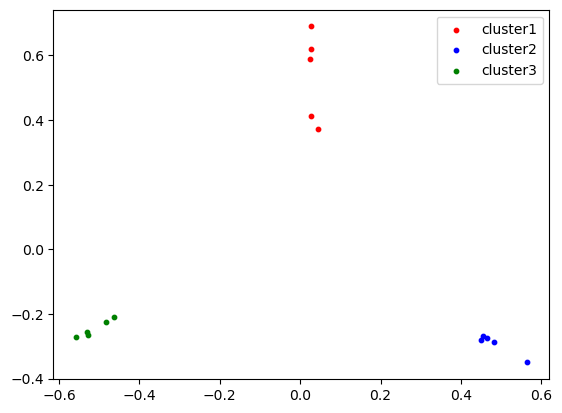

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#플로팅을 위하여 ca 기법(주성분분석)으로 차원을 2차원으로 축소
pca = PCA(n_components=2,random_state=10)
components = pca.fit_transform(df2)
df3 = pd.DataFrame(data = components, columns = ['component1', 'component 2'])
df3.index=df['검색어']
print(df3)
kmeans.labels_ == 0
# x축 : first, y축 : second 번호로 나타낸 후 시각화
plt.scatter(df3.iloc[kmeans.labels_ == 0, 0],
            df3.iloc[kmeans.labels_ == 0, 1], 
            s = 10, c = 'red', label = 'cluster1')
plt.scatter(df3.iloc[kmeans.labels_ == 1, 0],
            df3.iloc[kmeans.labels_ == 1, 1], 
            s = 10, c = 'blue', label = 'cluster2')
plt.scatter(df3.iloc[kmeans.labels_ == 2, 0],
            df3.iloc[kmeans.labels_ == 2, 1], 
            s = 10, c = 'green', label = 'cluster3')
plt.legend()